#Customer Churn Prediction: Develop a model to predict customer churn in a subscription-based business.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn.metrics import r2_score,mean_squared_error
import pickle

In [2]:
df=pd.read_csv('/content/drive/MyDrive/customer_churn_dataset.csv')
df

,CustomerID,Gender,Age,Tenure_Months,SubscriptionType,MonthlyCharges,TotalCharges,PaymentMethod,SupportTickets,ContractType,Churn
0,CUST1000,Male,49,54,Standard,99.33,4912.77,Net Banking,1,Two Year,0
1,CUST1001,Female,56,8,Standard,12.01,604.59,Debit Card,2,Two Year,0
2,CUST1002,Male,66,27,Basic,57.62,2019.39,Cash,4,Two Year,0
3,CUST1003,Male,69,27,Premium,97.08,4848.88,Credit Card,7,Two Year,0
4,CUST1004,Male,49,34,Standard,54.69,4334.26,Credit Card,9,One Year,1
...,...,...,...,...,...,...,...,...,...,...,...
195,CUST1195,Female,47,48,Basic,21.47,1897.88,Debit Card,2,Two Year,0
196,CUST1196,Female,55,21,Premium,90.19,1390.19,UPI,3,One Year,0
197,CUST1197,Female,55,39,Basic,12.62,3237.80,Debit Card,6,Two Year,0
198,CUST1198,Male,62,36,Standard,54.83,2073.23,Credit Card,0,Two Year,0


In [3]:
y=df['Churn']
x=df[['Tenure_Months','MonthlyCharges','TotalCharges']]

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [5]:
model=lm.LinearRegression()
model.fit(x_train,y_train)
with open('model_pickle','wb') as f:
  pickle.dump(model,f)

In [6]:
y_pred=model.predict(x_test)
y_pred

array([0.30758194, 0.32137416, 0.27305266, 0.29429274, 0.30413932,
       0.27863456, 0.26446263, 0.25805565, 0.30779859, 0.24421493,
       0.29468234, 0.27981053, 0.33530736, 0.27725373, 0.27808355,
       0.25892512, 0.28797862, 0.30300736, 0.31855022, 0.27189399,
       0.29167176, 0.26743392, 0.27112456, 0.29632713, 0.25722897,
       0.30981823, 0.32307379, 0.29537844, 0.29392307, 0.29319153,
       0.25871615, 0.25499324, 0.25641097, 0.28820855, 0.29437996,
       0.2912685 , 0.28934389, 0.2888858 , 0.29407774, 0.27500711])

In [10]:
r2=r2_score(y_test,y_pred)
r2

-0.0044649814815447275

In [13]:
mse=mean_squared_error(y_test,y_pred)
mse

0.18833718402778965

Text(0, 0.5, 'Predicted')

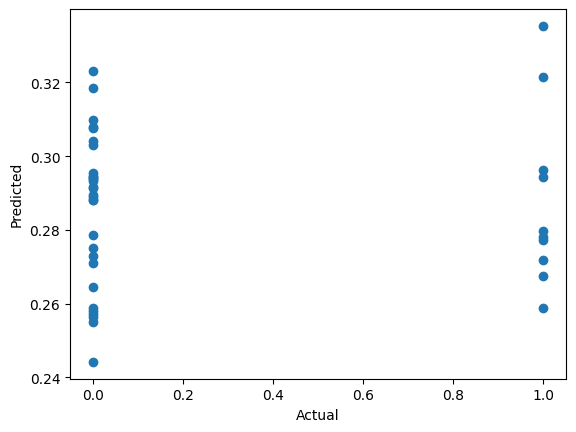

In [8]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')